### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy.special import boxcox1p

In [2]:
#%matplotlib inline

### 2. Spliting data into test/train

In [3]:
#Reading the two main sets
prices_test = pd.read_csv('Prices/test.csv')
prices_train = pd.read_csv('Prices/train.csv')

In [4]:
prices_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
prices_test.columns
prices_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3. Plotting relationship between features and Target

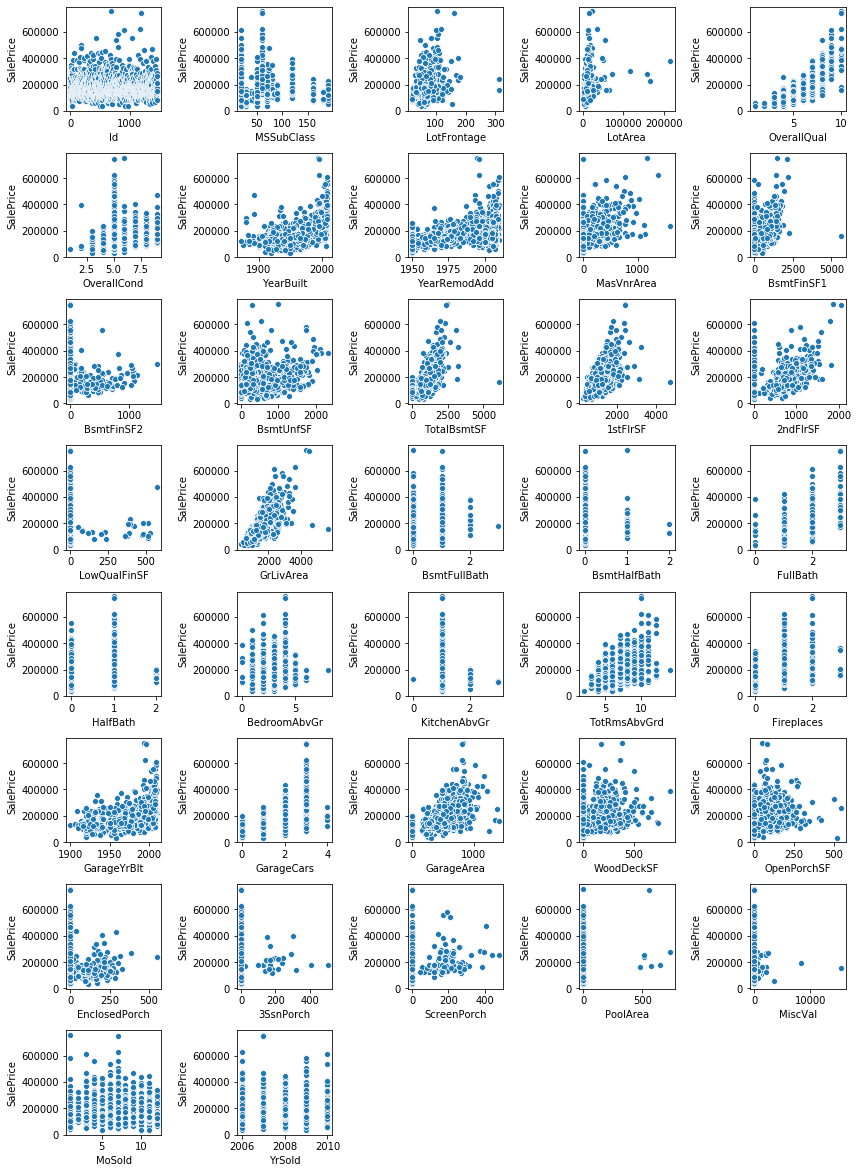

In [6]:
##Scatterplots, to see the graphical corrs between Sale Price and the diff features
numeric_features_train = prices_train.select_dtypes(exclude='object').drop(['SalePrice'], axis=1)
fig = plt.figure(figsize=(12,18))
for i in range(len(numeric_features_train.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.scatterplot(numeric_features_train.iloc[:, i],prices_train['SalePrice'])
plt.tight_layout()
plt.show()

### 4. Choosing 10 features with the high p.corr

In [7]:
# ##Returns the 10 features with highest p corr to Sale Prices

def biggest_corr_with_prices(df):
    corr = df.corr()["SalePrice"]
    corr_sorted = corr.sort_values(ascending=False)
    
    
    return corr_sorted.iloc[0:10]


In [8]:
biggest_corr_with_prices(prices_train)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

### 5. Examining missing values

In [9]:
n = prices_train.shape[0]
for col in prices_train.columns:
    missing_pct = sum(prices_train[col].isnull())*100/n
    if missing_pct > 50.0:
        print(f'{col}: {missing_pct:0.2f}%')

Alley: 93.77%
PoolQC: 99.52%
Fence: 80.75%
MiscFeature: 96.30%


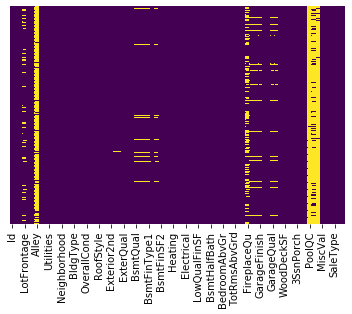

In [10]:
#Vizualizing the missing values from above --> the yellow bars represent missing values
sns.heatmap(prices_train.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [11]:
##..and the same for the test set
m = prices_test.shape[0]
for col in prices_test.columns:
    missing_pct = sum(prices_test[col].isnull())*100/m
    if missing_pct > 50.0:
        print(f'{col}: {missing_pct:0.2f}%')

Alley: 92.67%
FireplaceQu: 50.03%
PoolQC: 99.79%
Fence: 80.12%
MiscFeature: 96.50%


### 6. Droping columns with missing values

In [12]:
# The missing information in the mentioned columns is too much for them to have a significant impact on the results, so we can delete these columns...
prices_train.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'], axis=1, inplace=True)
prices_test.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'], axis=1, inplace=True)

### 7. Correlation matrix

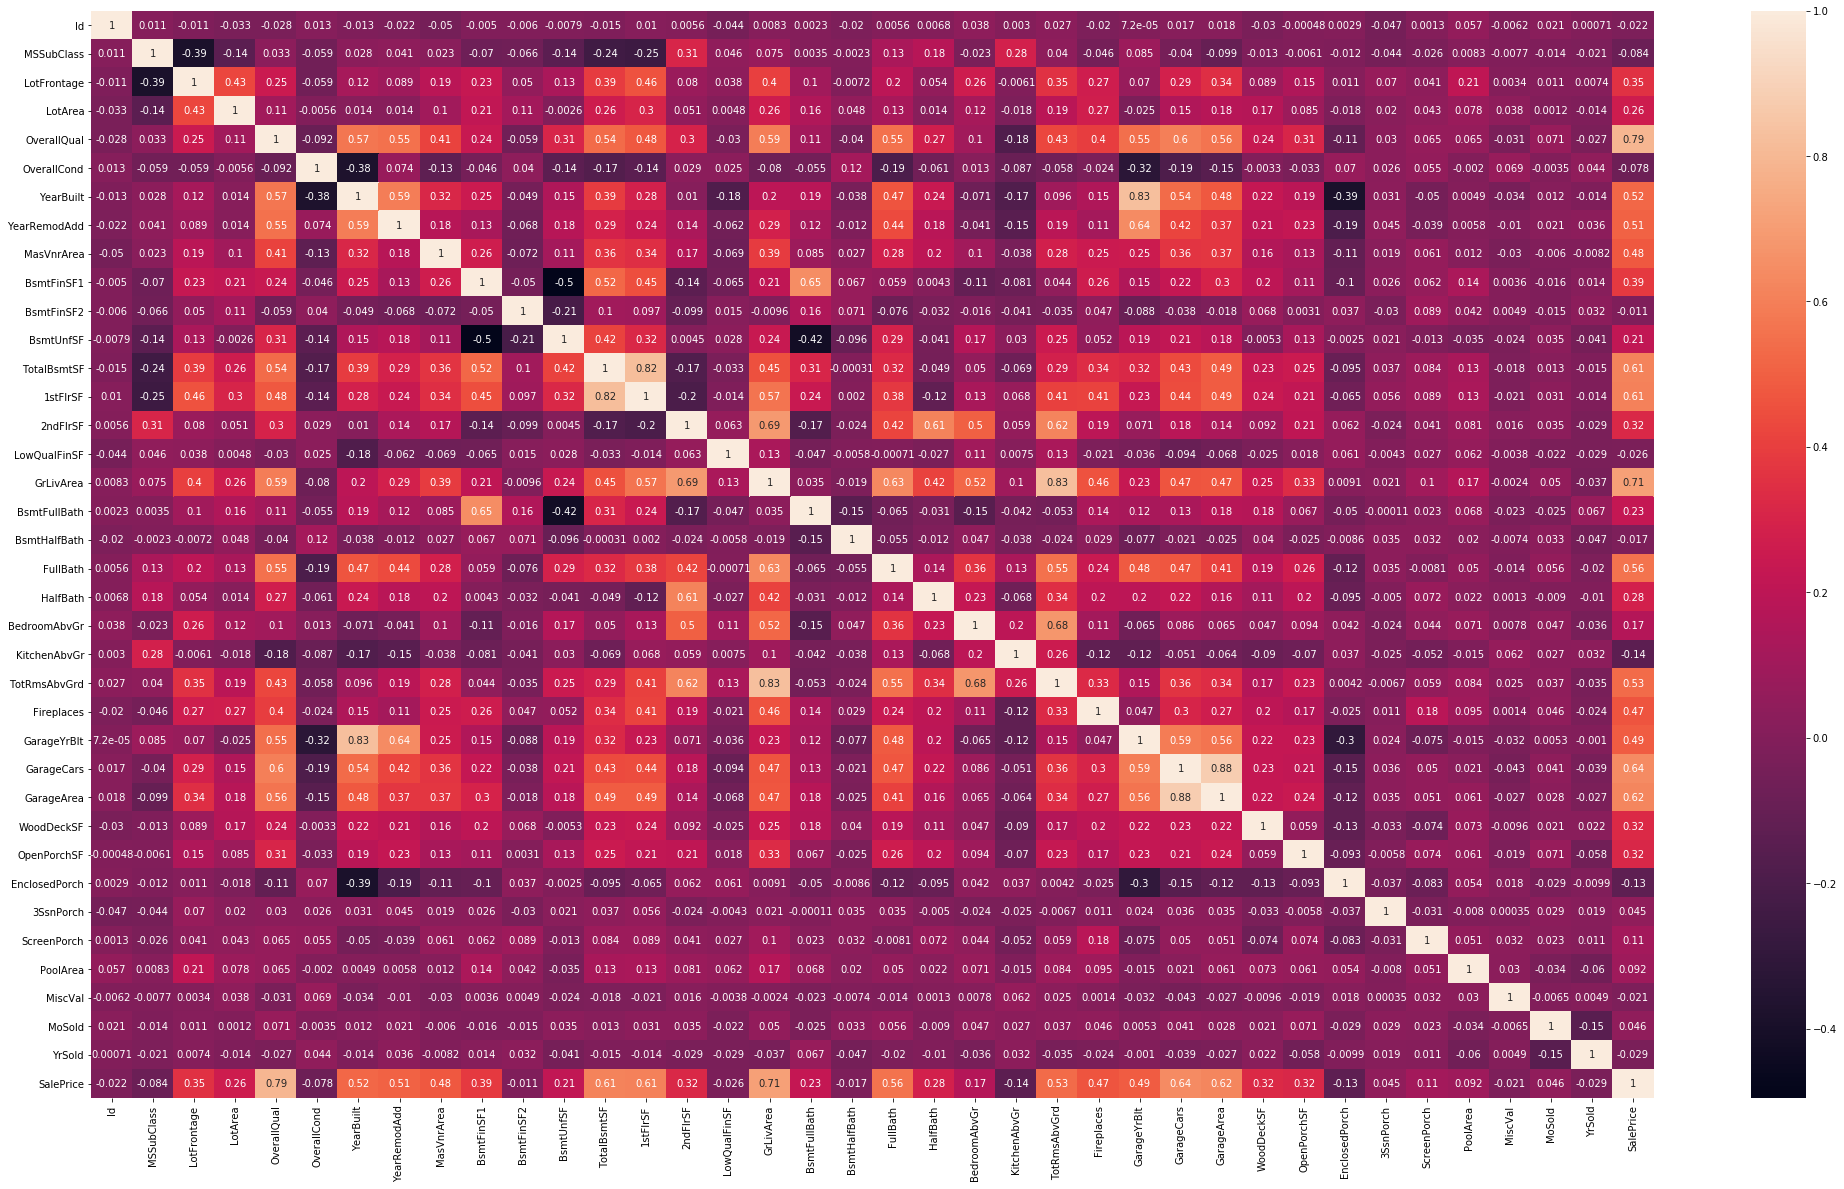

In [13]:
# # Let's explore the corr between the remaining features. Using a heatmap helps indentifying the dust in the wind ;) 
corrMatrix = prices_train.corr()
plt.subplots(figsize=(35,20))
sns.heatmap(corrMatrix,annot = True)


In [14]:
# Corr Matrix of abs values only
corr_matrix = prices_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1), np.triu
#.stack allows the shown multi-level index look of the Series

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack()
                 .sort_values(ascending=False)) 

### 8. Feature selection 2.0

In [15]:
## Bringing us to the highest corr features and their corr factors...
print(sol.iloc[1:20])

YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
2ndFlrSF      TotRmsAbvGrd    0.616423
TotalBsmtSF   SalePrice       0.613581
2ndFlrSF      HalfBath        0.609707
1stFlrSF      SalePrice       0.605852
OverallQual   GarageCars      0.600671
              GrLivArea       0.593007
YearBuilt     YearRemodAdd    0.592855
dtype: float64


### 9. Dealing with multicollinearity by droping hihgly correlated columns

In [16]:
# We can drop the columns avoiding multicollinearity. The choice for these columns and not GrLivArea, 1stFlSf etc.
# is because of their lower corr factor with SalePrices
prices_train.drop(['GarageArea', 'TotRmsAbvGrd','TotalBsmtSF','GarageYrBlt'], axis=1, inplace=True)
prices_test.drop(['GarageArea', 'TotRmsAbvGrd','TotalBsmtSF','GarageYrBlt'], axis=1, inplace=True)

### 10. Data prep - filling missing values where possible for both test/train

In [17]:
## Now filling out the remaining missing data. According to the data description Nan values have different meaning.. 
#Nan meaning, for example NoFireplace for the FireplaceQu column, Nan having a numeric 0 value for the LotFrontage column etc.
prices_train['FireplaceQu'] = prices_train['FireplaceQu'].fillna('NoFireplace')
prices_train['LotFrontage'] = prices_train['LotFrontage'].fillna(0)
prices_train['GarageCond'] = prices_train['GarageCond'].fillna('NoGarage')
prices_train['GarageType'] = prices_train['GarageType'].fillna('NoGarage')
prices_train['GarageFinish'] = prices_train['GarageFinish'].fillna(0)
prices_train['MasVnrArea'] = prices_train['MasVnrArea'].fillna(0)
prices_train['GarageQual'] = prices_train['GarageQual'].fillna('NoGarage')
prices_train['BsmtExposure'] = prices_train['BsmtExposure'].fillna('NoBsmt')
prices_train['BsmtFinType1'] = prices_train['BsmtFinType1'].fillna('NoBsmt')
prices_train['BsmtFinType2'] = prices_train['BsmtFinType2'].fillna('NoBsmt')
prices_train['BsmtCond'] = prices_train['BsmtCond'].fillna('NoBsmt')
prices_train['BsmtQual'] = prices_train['BsmtQual'].fillna('NoBsmt')
prices_train['MasVnrType'] = prices_train['MasVnrType'].fillna('None')
prices_train['MasVnrType'] = prices_train['MasVnrType'].fillna('None')
prices_train['Electrical'] = prices_train['Electrical'].fillna('None')


In [18]:
##Same thing for the test set
prices_test['FireplaceQu'] = prices_test['FireplaceQu'].fillna('NoFireplace')
prices_test['LotFrontage'] = prices_test['LotFrontage'].fillna(0)
prices_test['GarageCond'] = prices_test['GarageCond'].fillna('NoGarage')
prices_test['GarageType'] = prices_test['GarageType'].fillna('NoGarage')
prices_test['GarageFinish'] = prices_test['GarageFinish'].fillna(0)
prices_test['MasVnrArea'] = prices_test['MasVnrArea'].fillna(0)
prices_test['GarageQual'] = prices_test['GarageQual'].fillna('NoGarage')
prices_test['BsmtExposure'] = prices_test['BsmtExposure'].fillna('NoBsmt')
prices_test['BsmtFinType1'] = prices_test['BsmtFinType1'].fillna('NoBsmt')
prices_test['BsmtFinType2'] = prices_test['BsmtFinType2'].fillna('NoBsmt')
prices_test['BsmtCond'] = prices_test['BsmtCond'].fillna('NoBsmt')
prices_test['BsmtQual'] = prices_test['BsmtQual'].fillna('NoBsmt')
prices_test['MasVnrType'] = prices_test['MasVnrType'].fillna('None')
prices_test['MasVnrType'] = prices_test['MasVnrType'].fillna('None')
prices_test['Electrical'] = prices_test['Electrical'].fillna('None')
prices_test['MSZoning'] = prices_test['MSZoning'].fillna('None')
prices_test['Utilities'] = prices_test['Utilities'].fillna('None')
prices_test['Exterior1st'] = prices_test['Exterior1st'].fillna('None')
prices_test['Exterior2nd'] = prices_test['Exterior2nd'].fillna('None')
prices_test['BsmtFinSF1'] = prices_test['BsmtFinSF1'].fillna(0)
prices_test['BsmtFinSF2'] = prices_test['BsmtFinSF2'].fillna(0)
prices_test['BsmtFinSF1'] = prices_test['BsmtFinSF1'].fillna(0)
prices_test['BsmtUnfSF'] = prices_test['BsmtUnfSF'].fillna(0)
prices_test['BsmtFullBath'] = prices_test['BsmtFullBath'].fillna(0)
prices_test['BsmtHalfBath'] = prices_test['BsmtHalfBath'].fillna(0)
prices_test['KitchenQual'] = prices_test['KitchenQual'].fillna('None')
prices_test['Functional'] = prices_test['Functional'].fillna('None')
prices_test['GarageCars'] = prices_test['GarageCars'].fillna(0)
prices_test['SaleType'] = prices_test['SaleType'].fillna('None')

### 11. Feature engineering - total porch + total bath feature engineering

In [19]:
## Merging some columns from the two sets (My score from kaggle (and the MSE here :) ) indicate that not murging anything gives
#better resutls, so we leave it like this)
prices_train['TotalPorch'] = prices_train['OpenPorchSF'] + prices_train['EnclosedPorch'] + prices_train['3SsnPorch'] + prices_train['ScreenPorch']
prices_test['TotalPorch'] = prices_test['OpenPorchSF'] + prices_test['EnclosedPorch'] + prices_test['3SsnPorch'] + prices_test['ScreenPorch']

prices_train['Total_Bath'] = (prices_train['FullBath'] + (0.5 * prices_train
                                                          ['HalfBath']) + prices_train['BsmtFullBath'] + (0.5 * prices_train['BsmtHalfBath']))

prices_test['Total_Bath'] = (prices_test['FullBath'] + (0.5 * prices_test
                                                          ['HalfBath']) + prices_test['BsmtFullBath'] + (0.5 * prices_test['BsmtHalfBath']))


In [20]:
prices_train.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'], axis = 1, inplace=True)
prices_test.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'], axis = 1, inplace=True)

In [21]:
prices_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'TotalPorch', 'Total_Ba

### 12. Dealing with outliers in the 5 strongest corr features

Text(0.5, 1.0, 'Overall Qual - Sale Price ')

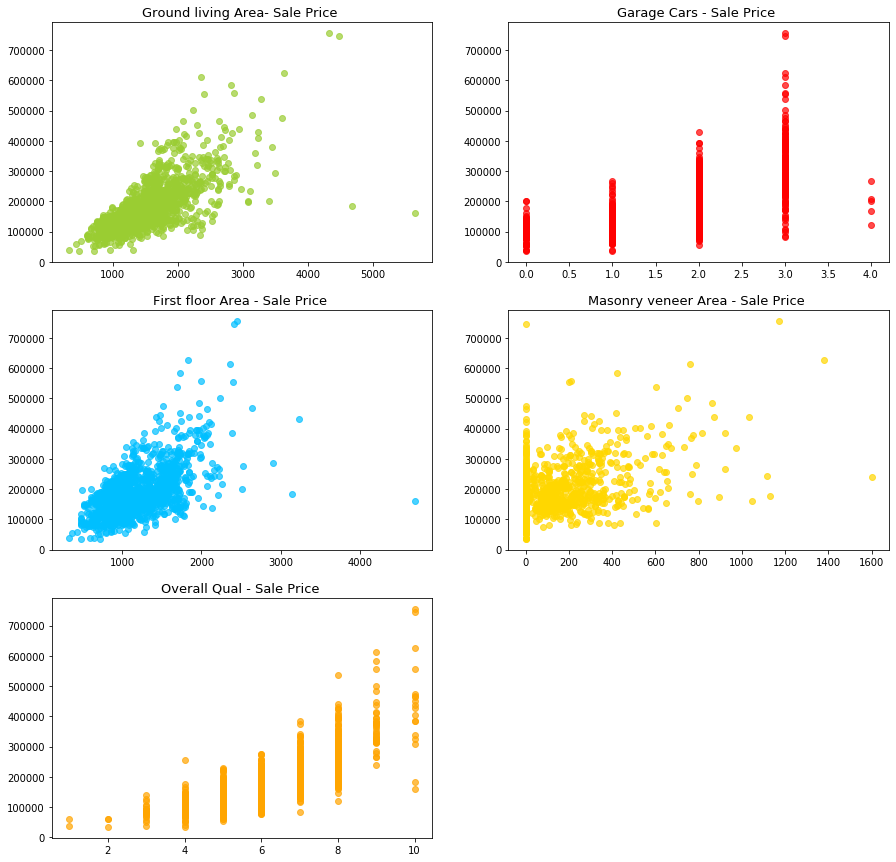

In [22]:
## Now let's check for outliers in the 5 strongest corr features with Sale Price

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=prices_train['GrLivArea'], y=prices_train['SalePrice'], color=('yellowgreen'),alpha=0.7)
plt.title('Ground living Area- Sale Price ', fontsize=13 )


ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=prices_train['1stFlrSF'], y=prices_train['SalePrice'], color=('deepskyblue'),alpha=0.7)
plt.title('First floor Area - Sale Price ', fontsize=13, )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=prices_train['MasVnrArea'], y=prices_train['SalePrice'], color=('gold'),alpha=0.7)
plt.title('Masonry veneer Area - Sale Price ', fontsize=13 )


ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=prices_train['GarageCars'], y=prices_train['SalePrice'], color=('red'),alpha=0.7)
plt.title('Garage Cars - Sale Price ', fontsize=13 )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=prices_train['OverallQual'], y=prices_train['SalePrice'], color=('orange'),alpha=0.7)
plt.title('Overall Qual - Sale Price ', fontsize=13 )




Text(0.5, 1.0, 'First floor Living area - Box Plot ')

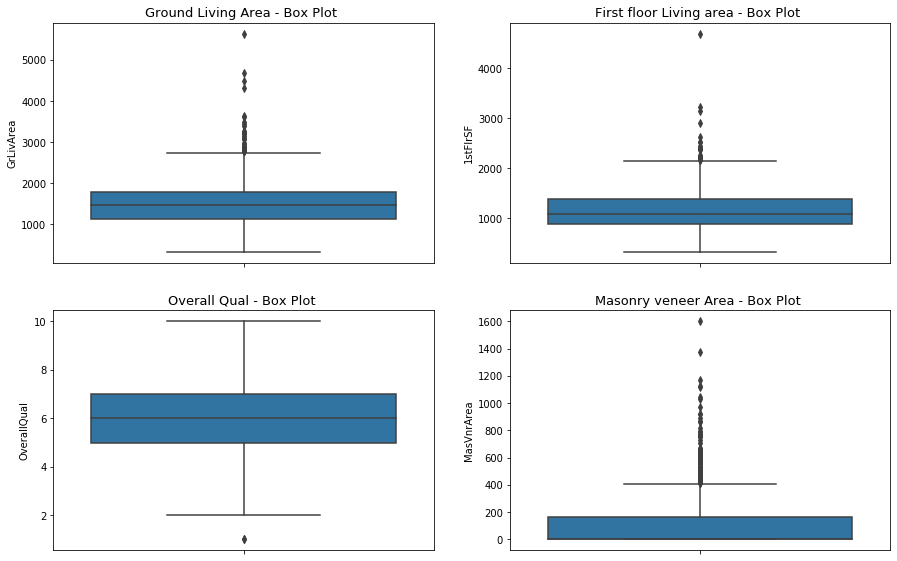

In [23]:
## Using some barplots to get some basic information for the outliers in the same features

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(1,0))
ax = sns.boxplot(y=prices_train["OverallQual"])
plt.title('Overall Qual - Box Plot ', fontsize=13 )

ax1 = plt.subplot2grid((3,2),(0,0))
ax = sns.boxplot(y=prices_train["GrLivArea"])
plt.title('Ground Living Area - Box Plot ', fontsize=13 )




ax1 = plt.subplot2grid((3,2),(1,1))
ax = sns.boxplot(y=prices_train["MasVnrArea"])
plt.title('Masonry veneer Area - Box Plot ', fontsize=13 )


ax1 = plt.subplot2grid((3,2),(0,1))
ax = sns.boxplot(y=prices_train["1stFlrSF"])
plt.title('First floor Living area - Box Plot ', fontsize=13 )

### 13. Droping rows based on the IQR method (.25 and .75 quantile)

In [24]:

## The main idea here is to delete the few outliers from the first scatter plots above...having the highest potential for 
#deteriorating the used model later on. The usage of the IQR method (see the link below) could help detecting all outliers. 
# The ones occuring in all of the features are the one we are looking for..
# https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244#:~:text=Using%20the%20Interquartile%20Rule%20to%20Find%20Outliers&text=Multiply%20the%20interquartile%20range%20(IQR,constant%20used%20to%20discern%20outliers).&text=Any%20number%20greater%20than%20this,this%20is%20a%20suspected%20outlier.
def iqr_method(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    return(df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))

first_floor_outliers =  iqr_method(prices_train['1stFlrSF'])
overall_qual_outliers = iqr_method(prices_train['OverallQual'])
living_area_outliers = iqr_method(prices_train['GrLivArea'])
garage_cars_outliers = iqr_method(prices_train['GarageCars'])
mas_Vnr_Area_outliers = iqr_method(prices_train['MasVnrArea'])



first = first_floor_outliers[first_floor_outliers].index.tolist()
second = living_area_outliers[living_area_outliers].index.tolist()
third = mas_Vnr_Area_outliers[mas_Vnr_Area_outliers].index.tolist()
# combining the indexes into one big list
one_whole_list = []
one_whole_list.append(first)
one_whole_list.append(second)
one_whole_list.append(third)

# finding the matches inside the big list
set.intersection(*map(set,one_whole_list))




{523, 691, 1298}

In [25]:
#So now we can drop the rows
prices_train = prices_train.drop(523)
prices_train = prices_train.drop(691)
prices_train = prices_train.drop(1298)


### 14. Converting features  to categorical data

In [26]:
# Changing the type of the columns so that they can be handle with get_dummies

cols = ["MSSubClass", "YrSold", 'MoSold']
prices_train[cols] = prices_train[cols].astype(str)
prices_test[cols] = prices_test[cols].astype(str)

### 15. Checking for Skewness and Kurtosis of the target variable

In [27]:
## Skewness

Skewness: 1.728284
Kurtosis: 5.257333


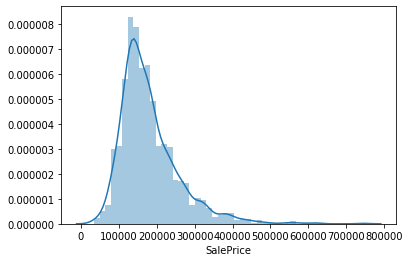

In [28]:
# Before we continue with the modelling, let's check the distribution curve of our target variable - Sale Price. It looks like
#it's not quite normally distributed. One way we can deal with that is doing a log transformation
print("Skewness: %f" % prices_train['SalePrice'].skew())
print("Kurtosis: %f" % prices_train['SalePrice'].kurt())
sns.distplot(prices_train['SalePrice']);

### 16. Fixing the skewness with log function

In [29]:
# #applying log transformation (works for positive skewness)
prices_train['SalePrice'] = np.log1p(prices_train['SalePrice'])

Skewness: 0.093549
Kurtosis: 0.735662


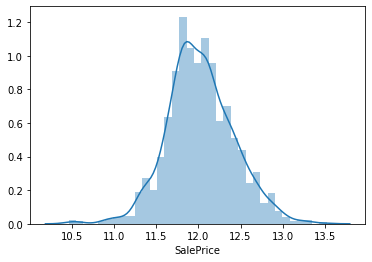

In [30]:
## Looking better now
print("Skewness: %f" % prices_train['SalePrice'].skew())
print("Kurtosis: %f" % prices_train['SalePrice'].kurt())
sns.distplot(prices_train['SalePrice']);

In [31]:
# Now we can save our target variable
y = prices_train['SalePrice']

In [32]:
#... and droping it out from the main train set
prices_train.drop(['SalePrice'], axis=1, inplace=True)

In [33]:
## For the purpose of the kaggle competion and the easyier usage of one set instead of two, 
#let's combine (connect) the train and test sets
frames = [prices_train,prices_test]
prices = pd.concat(frames,keys=['train','test'])

### 17. Checking for skewness of the features

In [34]:
#Features with highest skew
numeric_features = prices.dtypes[prices.dtypes != "object"].index
skewed_features = prices[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skewness = skewed_features[abs(skewed_features)]
print(skewed_features)


MiscVal         21.935910
PoolArea        17.685603
LotArea         13.122065
LowQualFinSF    12.082427
KitchenAbvGr     4.299698
BsmtFinSF2       4.143683
MasVnrArea       2.601232
TotalPorch       2.243910
WoodDeckSF       1.847693
1stFlrSF         1.254920
GrLivArea        1.028782
BsmtFinSF1       0.981362
BsmtUnfSF        0.920665
2ndFlrSF         0.854898
Fireplaces       0.725620
OverallCond      0.569642
Total_Bath       0.486150
BedroomAbvGr     0.327348
OverallQual      0.185768
Id              -0.001545
LotFrontage     -0.127080
GarageCars      -0.219348
YearRemodAdd    -0.449635
YearBuilt       -0.598638
dtype: float64


In [2]:
high_skewness = skewed_features[abs(skewed_features) > 1]
skewed_features = high_skewness.index
print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)

NameError: name 'skewed_features' is not defined

### 18. Features with high skewness (>1) are being log-ed

In [36]:
#log transformation for the feature with highest skewness
for feature in skewed_features:
    prices[feature] = np.log1p(prices[feature])

### 19. Transforming features to dummies

In [37]:
#Having the knowledge of categorical and ordinal features, I choose to work only with dummy and numerical values
#(and not ordering them also into categorical groups) ,
#let's hope for the best!
dummys = pd.get_dummies(prices, drop_first=True)
X = dummys.loc['train']
testing_prices = dummys.loc['test']
Id = testing_prices.Id

In [38]:
X.drop('Id',axis=1,inplace=True)
testing_prices.drop('Id',axis=1,inplace=True)

C:\Users\Emil\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 20. Creating the XGB Boost

In [39]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict


import xgboost as xgb

### 20.1 Splitting data into train/test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)


### 20.2 XGB Regresoor, gives best result from the tried methods

In [42]:
param_init = {
    "max_depth": 5, # default: 3 only for depthwise
    "n_estimators": 3000, # default: 500
    "learning_rate": 0.01, # default: 0.05
    "subsample": 0.5,
    "colsample_bytree": 0.25,  # default:  1.0
    "min_child_weight": 1.5,
    "reg_alpha": 0.75,
    "reg_lambda": 0.4,
    "seed": 42,
    #"eval_metric": "rmse"
}
param_fit = {
    "eval_metric": "rmse",
#     "early_stopping_rounds": 500, # default: 100
    "verbose": 200,
#     "eval_set": [(X_val, y_val)],
    
}

In [43]:
xgboost = xgb.XGBRegressor(**param_init)
xgboost.fit(X_train, y_train, **param_fit)


[0]	validation_0-rmse:11.41765
Will train until validation_0-rmse hasn't improved in 500 rounds.
[200]	validation_0-rmse:1.55410
[400]	validation_0-rmse:0.27018
[600]	validation_0-rmse:0.14894
[800]	validation_0-rmse:0.13633
[1000]	validation_0-rmse:0.13151
[1200]	validation_0-rmse:0.12863
[1400]	validation_0-rmse:0.12709
[1600]	validation_0-rmse:0.12620
[1800]	validation_0-rmse:0.12563
[2000]	validation_0-rmse:0.12523
[2200]	validation_0-rmse:0.12485
[2400]	validation_0-rmse:0.12466
[2600]	validation_0-rmse:0.12435
[2800]	validation_0-rmse:0.12417
[2999]	validation_0-rmse:0.12406


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.25, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.4, scale_pos_weight=1, seed=42, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 20.3 Prediciting test values of the train set

MAE: 0.08963662904465414

MSE: 0.01887047160260718

RMS: 0.1373698351262284

RMLES: 0.010645218752994822

In [44]:
y_pred_model = xgboost.predict(X_test) 

Text(0, 0.5, 'Sale Prices Predicted')

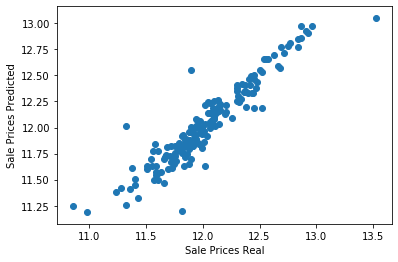

In [45]:
#xg_2 = cross_val_score(estimator = xgboost,X = X_train,y = y_train,cv=10)

plt.scatter(y_test, y_pred_model)
plt.xlabel('Sale Prices Real')
plt.ylabel('Sale Prices Predicted')

In [46]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_model))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_model))
print('RMS:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_model)))
print('RMLES:',np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_model)))

MAE: 0.08963662904465414
MSE: 0.01887047160260718
RMS: 0.1373698351262284
RMLES: 0.010645218752994822


### 20.4 Predicting the train set

In [4]:
SalePrice_pred_xg = xgboost.predict(testing_prices)


main_submission_4 = pd.DataFrame({'Id': Id, 'SalePrice': np.exp(SalePrice_pred_xg)})

main_submission_4.to_csv("submission8.csv", index=False)
main_submission_4.head()

NameError: name 'xgboost' is not defined

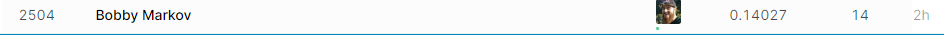